<a href="https://colab.research.google.com/github/Hyunta/Bigdata/blob/main/2021_01_06_Decision_Tree_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus

In [ ]:
tennis_data = pd.read_csv('playtennis.csv')

In [ ]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

In [ ]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes
5,2,Cool,Normal,Strong,No
6,1,Cool,Normal,Strong,Yes
7,0,Mild,High,Weak,No
8,0,Cool,Normal,Weak,Yes
9,2,Mild,Normal,Weak,Yes


In [ ]:
tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 1)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 2)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 3)

In [ ]:
tennis_data.Humidity = tennis_data.Humidity.replace('High', 1)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 2)

In [ ]:
tennis_data.Wind = tennis_data.Wind.replace('Weak', 1)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 2)

In [ ]:
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 1)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 2)
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [ ]:
X = np.array(pd.DataFrame(tennis_data, columns=['Outlook','Temperature','Humidity','Wind']))
y = np.array(pd.DataFrame(tennis_data, columns=['PlayTennis']))

In [ ]:
X,y

(array([[0, 1, 1, 1],
        [0, 1, 1, 2],
        [1, 1, 1, 1],
        [2, 2, 1, 1],
        [2, 3, 2, 1],
        [2, 3, 2, 2],
        [1, 3, 2, 2],
        [0, 2, 1, 1],
        [0, 3, 2, 1],
        [2, 2, 2, 1],
        [0, 2, 2, 2],
        [1, 2, 1, 2],
        [1, 1, 2, 1],
        [2, 2, 1, 2]]), array([[1],
        [1],
        [2],
        [2],
        [2],
        [1],
        [2],
        [1],
        [2],
        [2],
        [2],
        [2],
        [2],
        [1]]))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
dt_clf = DecisionTreeClassifier()
dt_clf = dt_clf.fit(X_train, y_train)

In [ ]:
dt_prediction = dt_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, dt_prediction)
print("정확도: ",accuracy)

정확도:  0.75


In [ ]:
feature_names = tennis_data.columns.tolist()
feature_names = feature_names[0:4]

In [ ]:
target_name = np.array(['Play No', 'Play Yes'])

In [ ]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file= None,
                                   feature_names = feature_names,
                                   class_names = target_name,
                                   filled = True, rounded = True,
                                   special_characters = True)

In [ ]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

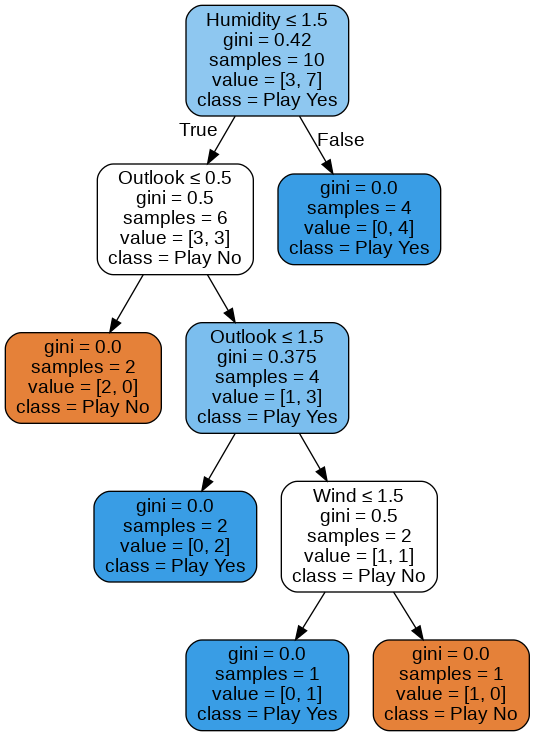

In [ ]:
Image(dt_graph.create_png())